<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1131 non-null   float64
 1   sex                  1131 non-null   float64
 2   chest pain type      1131 non-null   float64
 3   resting bp s         1131 non-null   float64
 4   cholesterol          1131 non-null   float64
 5   fasting blood sugar  1131 non-null   float64
 6   resting ecg          1131 non-null   float64
 7   max heart rate       1131 non-null   float64
 8   exercise angina      1131 non-null   float64
 9   oldpeak              1131 non-null   float64
 10  ST slope             1131 non-null   float64
 11  target               1190 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1131.000000  1131.000000      1131.000000   1131.

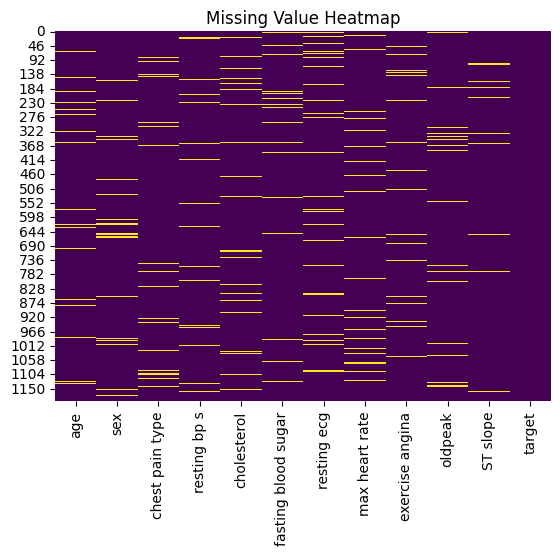

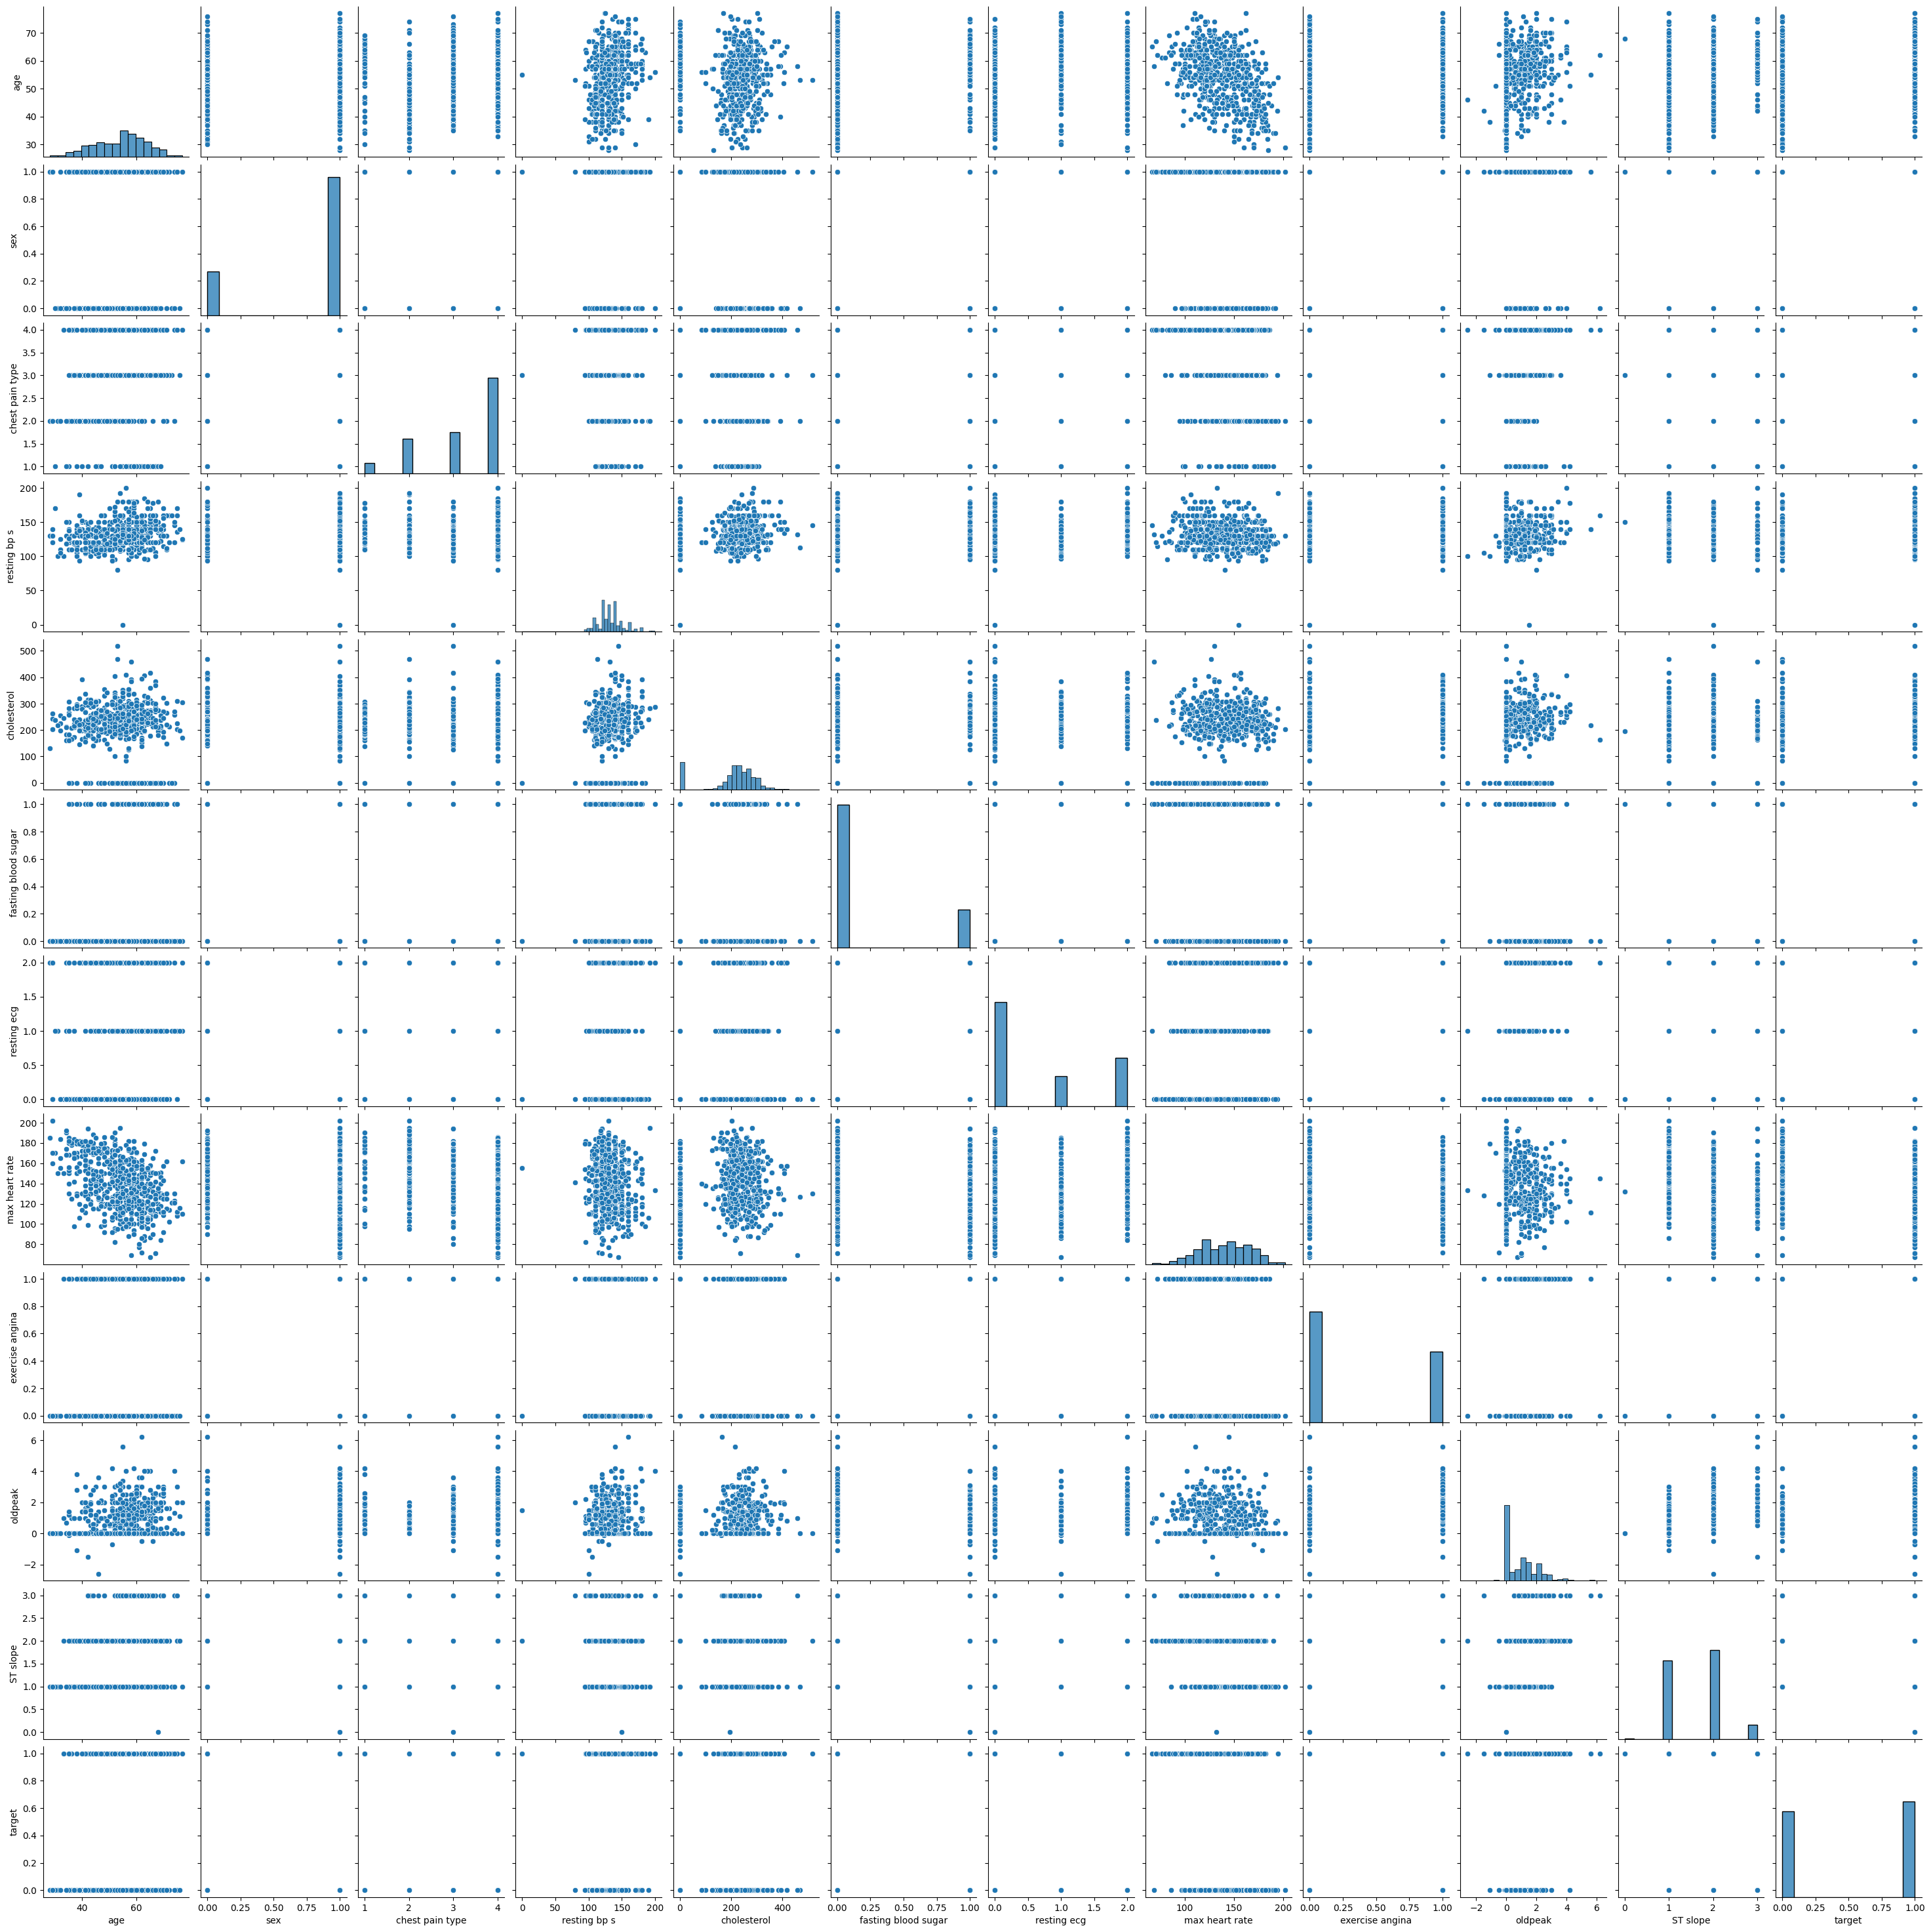

No categorical variables detected.
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


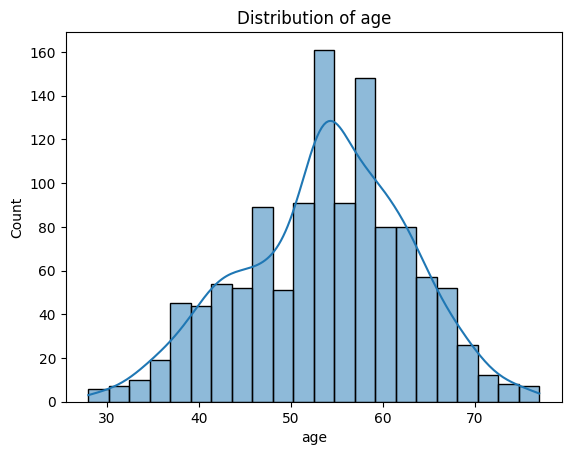

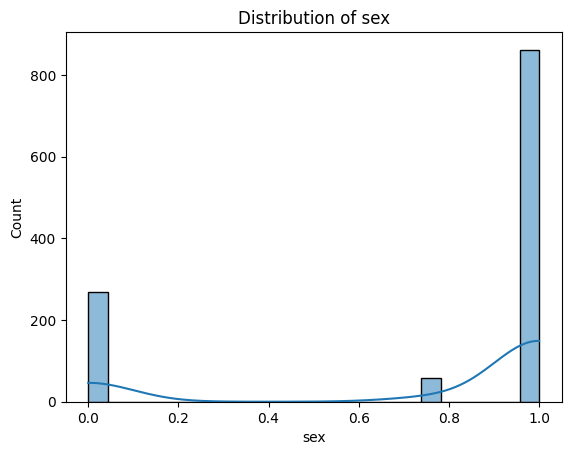

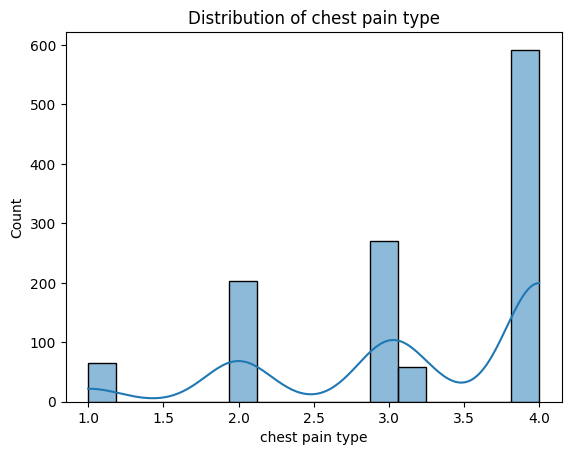

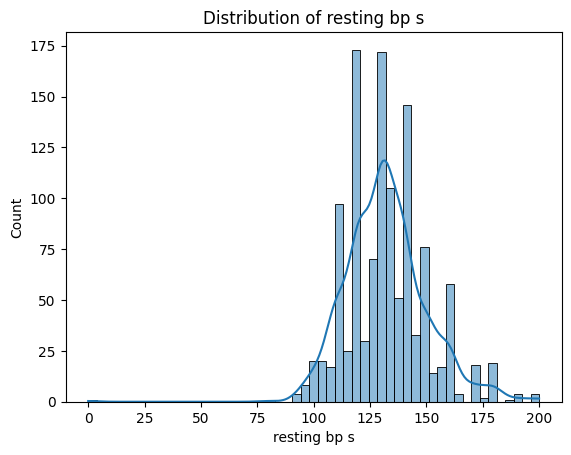

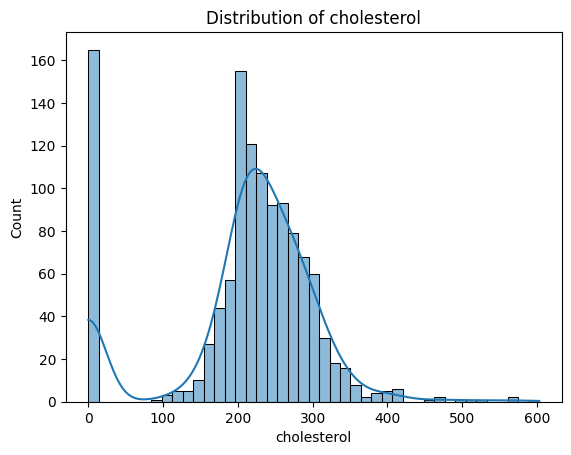

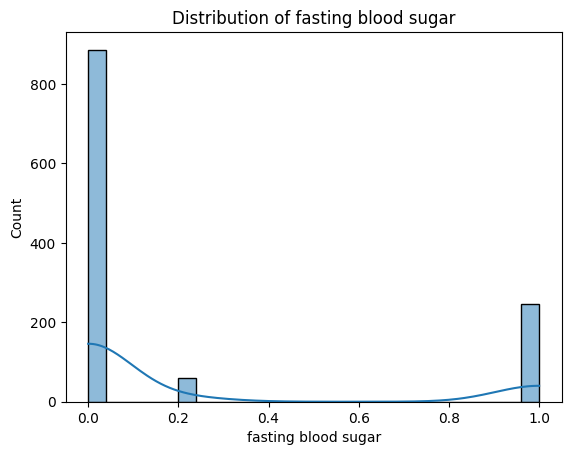

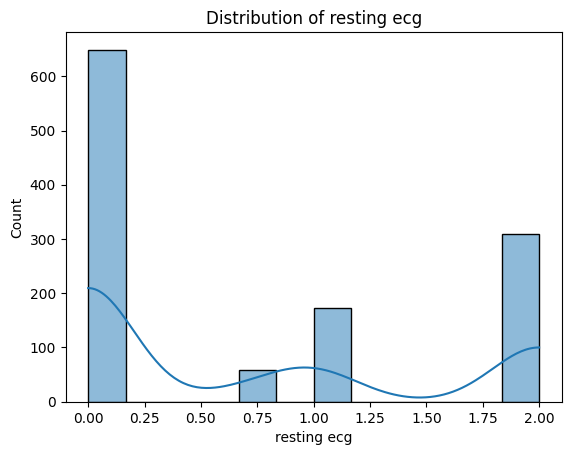

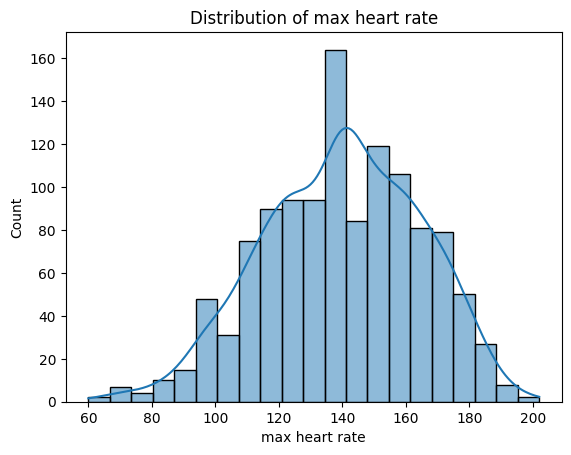

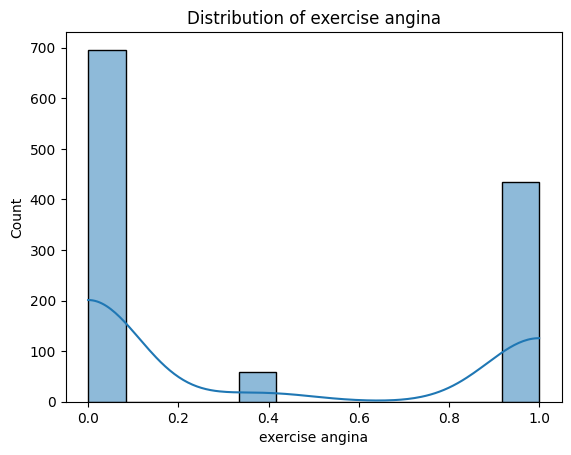

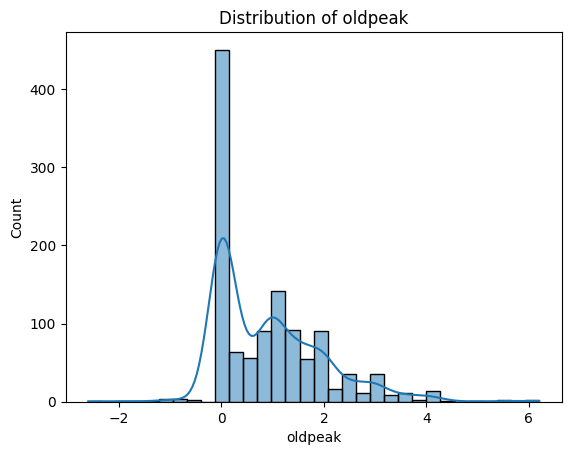

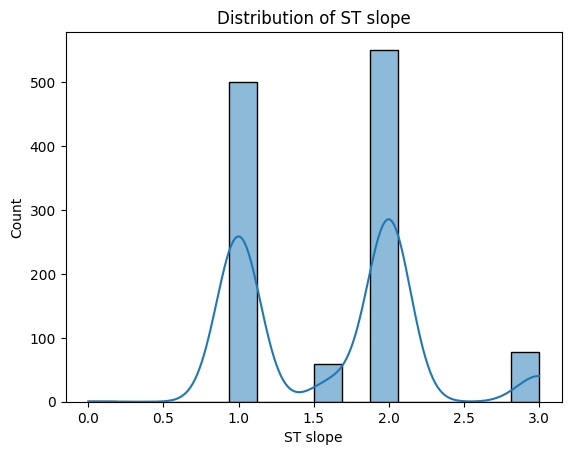

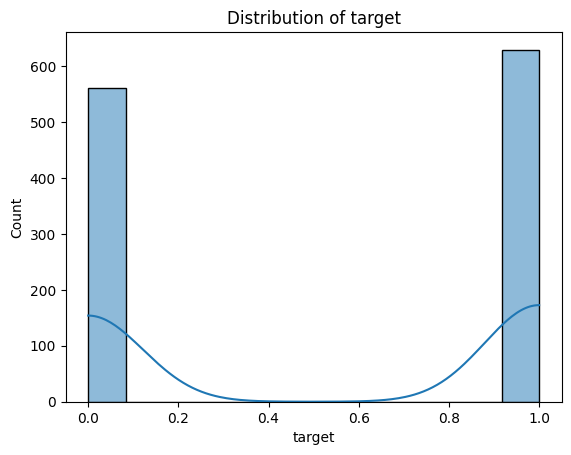

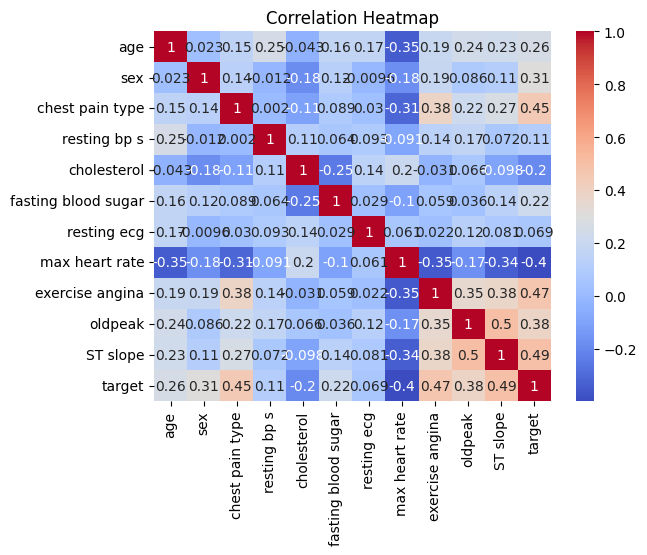

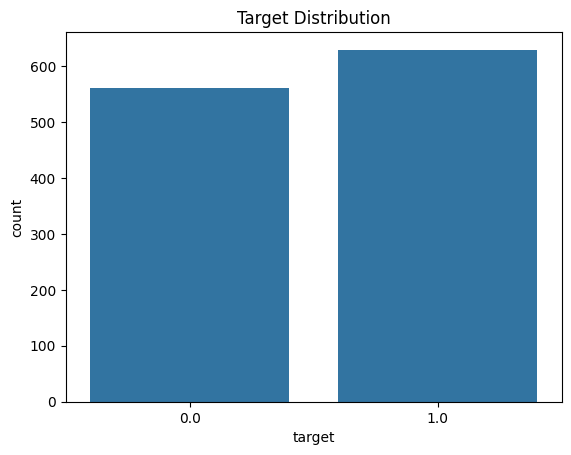

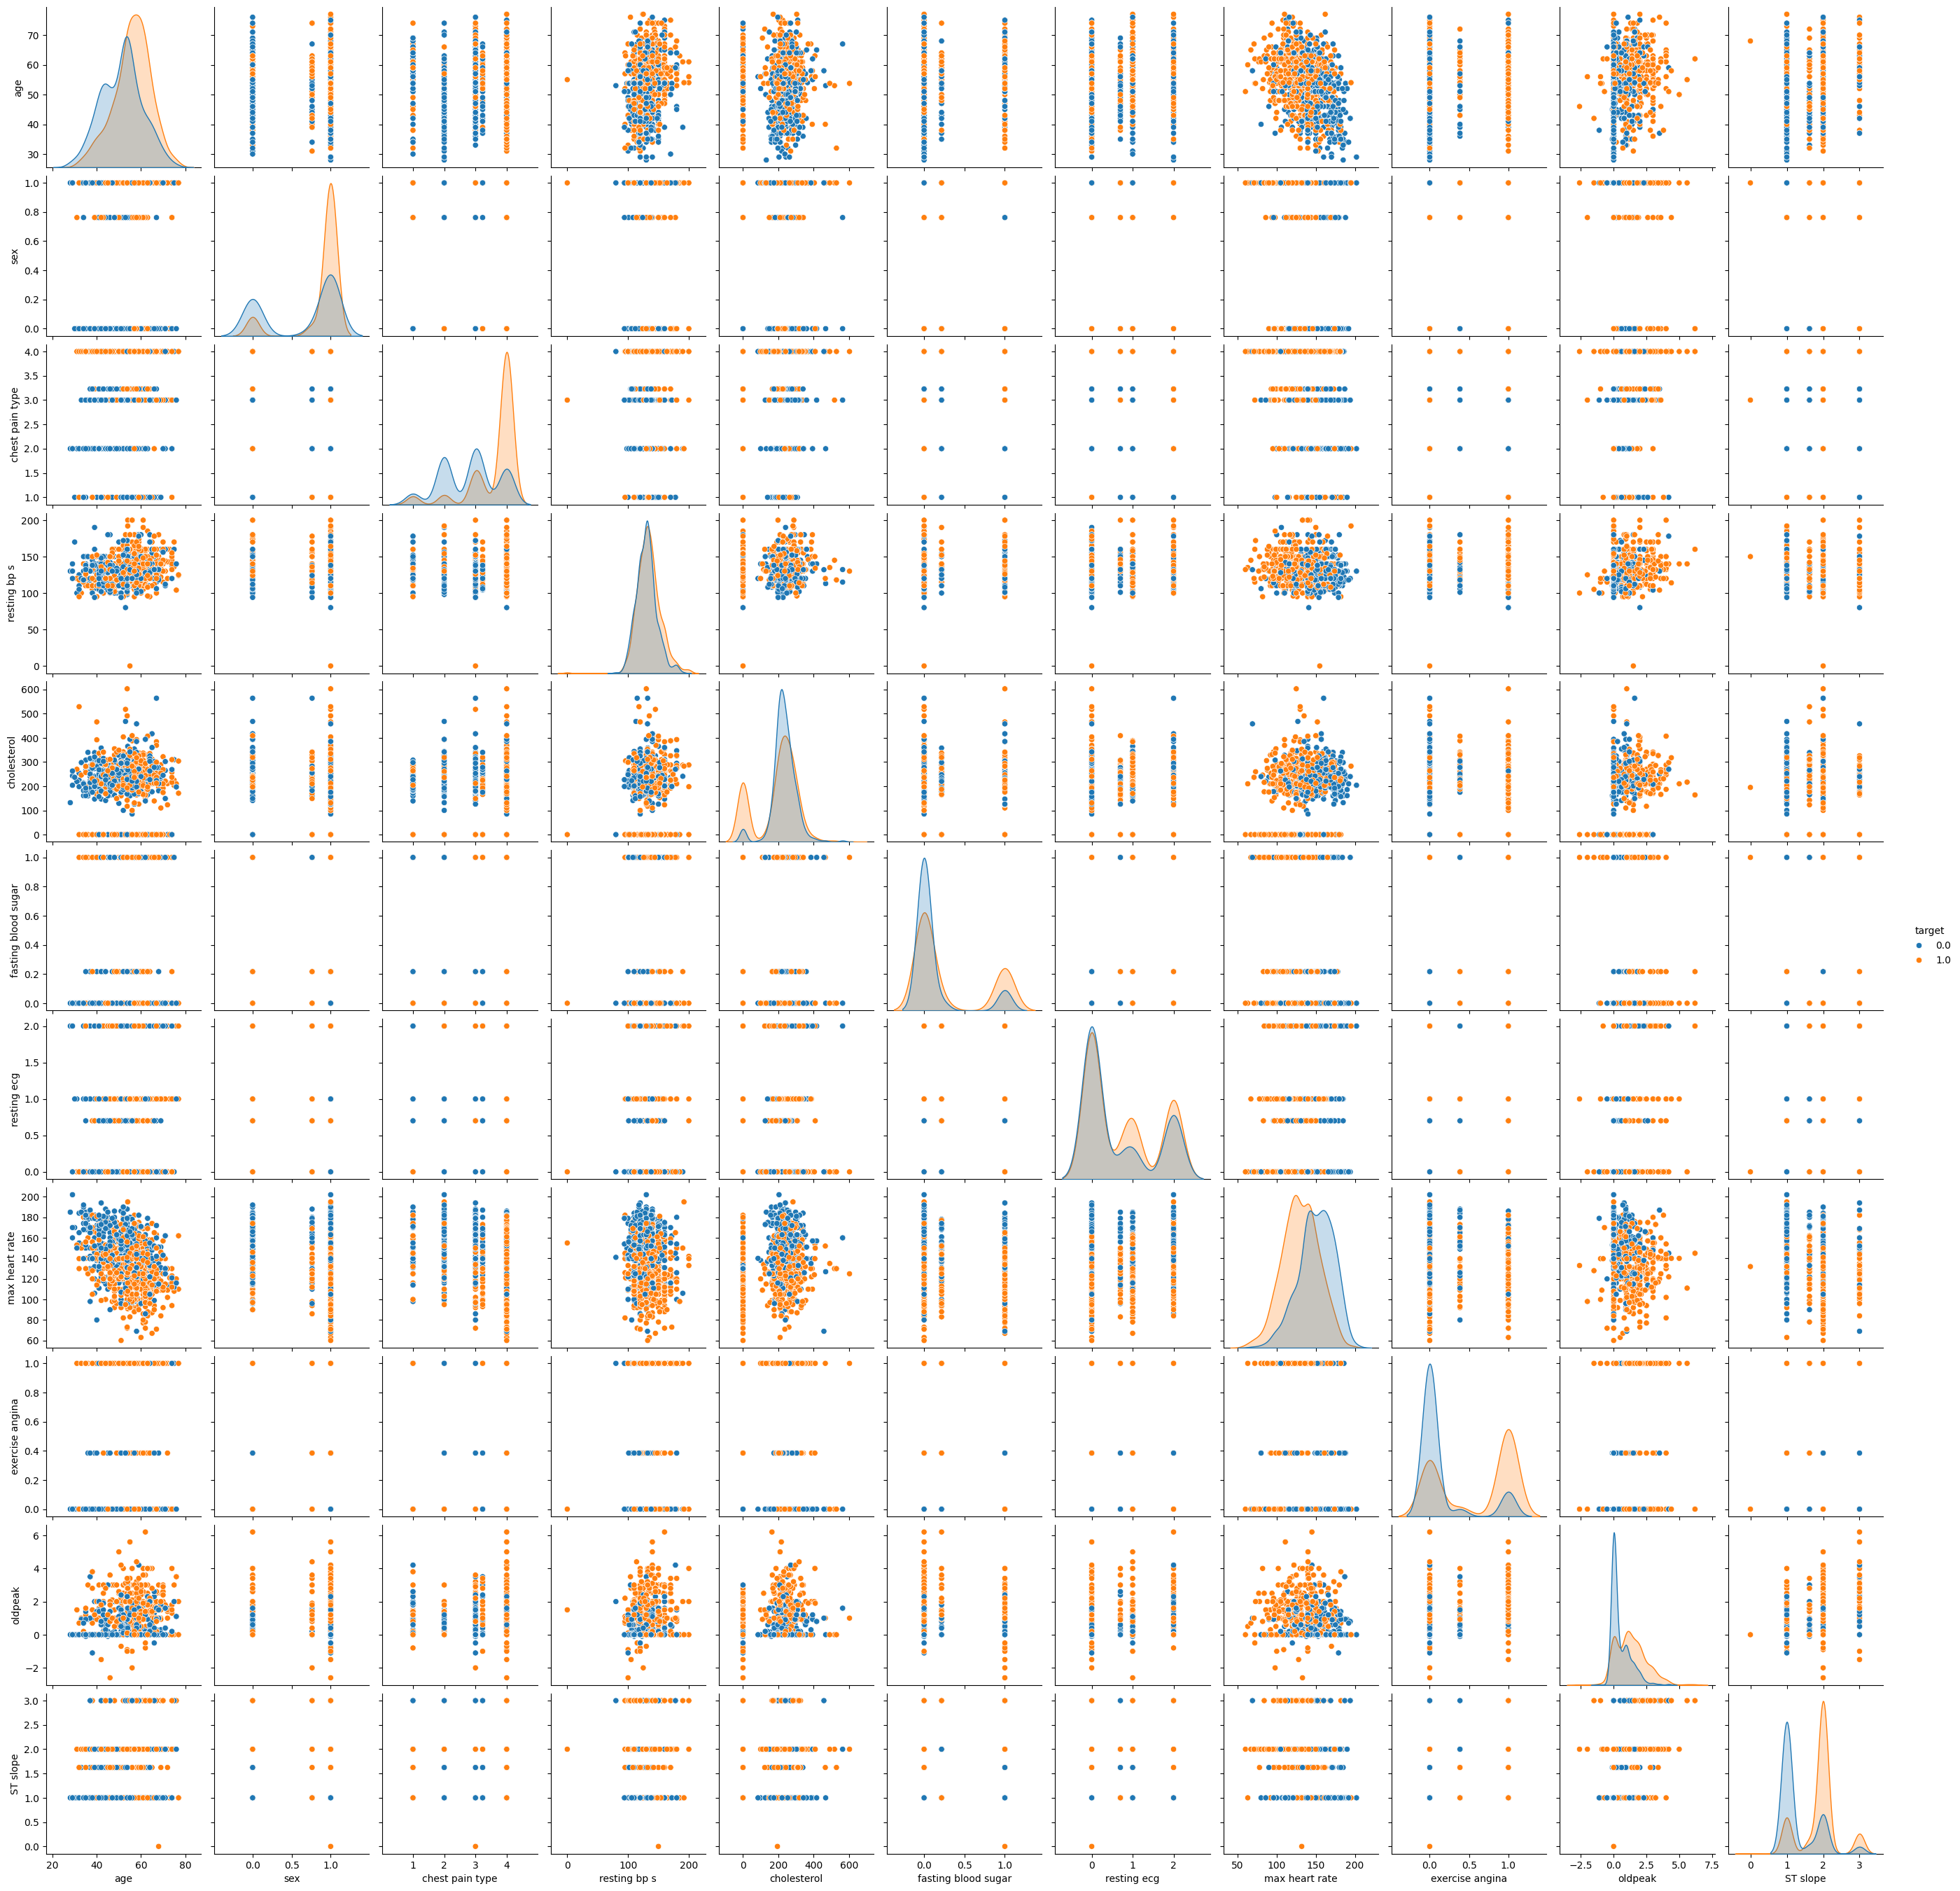

                Feature  Importance
10             ST slope    0.158200
2       chest pain type    0.140456
7        max heart rate    0.129293
4           cholesterol    0.106416
8       exercise angina    0.098249
9               oldpeak    0.098147
0                   age    0.086876
3          resting bp s    0.081422
1                   sex    0.048708
6           resting ecg    0.027875
5   fasting blood sugar    0.024358
Training Logistic Regression...
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       154
         1.0       0.87      0.87      0.87       203

    accuracy                           0.85       357
   macro avg       0.85      0.85      0.85       357
weighted avg       0.85      0.85      0.85       357

Accuracy: 0.8515406162464986
ROC-AUC: 0.9090909090909092
Training Random Forest...
Random Forest Classification Report:
               precision    recall  f1-score 

D:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       154
         1.0       0.93      0.92      0.92       203

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357

Accuracy: 0.9131652661064426
ROC-AUC: 0.9508028916895912
Training KNN...
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       154
         1.0       0.87      0.90      0.88       203

    accuracy                           0.87       357
   macro avg       0.86      0.86      0.86       357
weighted avg       0.87      0.87      0.87       357

Accuracy: 0.865546218487395
ROC-AUC: 0.9156323971594907
Training Gradient Boosting...
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0

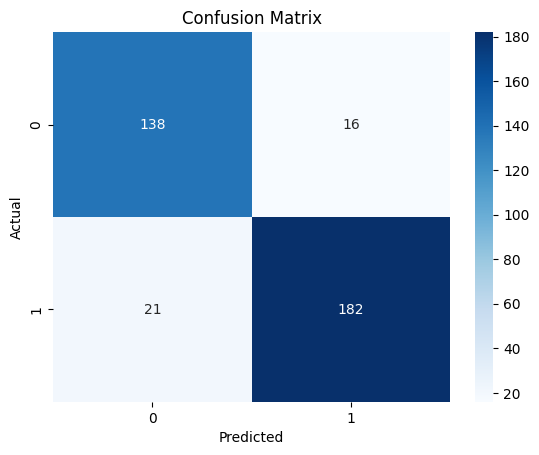

Cross-Validation ROC-AUC Scores: [0.92642898 0.99064626 0.94019274 0.92063492 0.93480726 0.98582766
 0.96697846 0.97278912 0.99631519 0.95464853]
Mean ROC-AUC Score: 0.958926911171939


In [5]:









import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
data = pd.read_csv('heart_dataset_with_missing.csv')

# Initial inspection
print(data.info())
print(data.describe())

# Checking for missing values
missing_summary = data.isnull().sum()
print("Missing Values Summary:\n", missing_summary)

# 2. Missing Mechanism Detection
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

# Visualizing missing patterns with pairwise plots
sns.pairplot(data.dropna())
plt.show()

# 3. Missing Value Imputation
# Numeric features imputation with mean
data_numeric = data.select_dtypes(include=['float64', 'int64'])
numeric_imputer = SimpleImputer(strategy='mean')
data_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Handling categorical data
data_categorical = data.select_dtypes(include=['object'])
if data_categorical.shape[1] == 0:
    print("No categorical variables detected.")
else:
    # Remove entirely null columns
    data_categorical = data_categorical.dropna(how='all', axis=1)
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data_categorical_imputed = pd.DataFrame(
        categorical_imputer.fit_transform(data_categorical),
        columns=data_categorical.columns
    )

# Combine numeric and categorical
if data_categorical.shape[1] > 0:
    data_cleaned = pd.concat([data_numeric_imputed, data_categorical_imputed], axis=1)
else:
    data_cleaned = data_numeric_imputed

# Verify missing values
print(data_cleaned.isnull().sum())

# 4. Exploratory Data Analysis
# Plot distributions for numeric variables
for col in data_numeric_imputed.columns:
    plt.figure()
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation heatmap
correlation = data_cleaned.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Target distribution
sns.countplot(x='target', data=data_cleaned)
plt.title("Target Distribution")
plt.show()

# Additional pairplot for numeric variables
sns.pairplot(data_cleaned, hue='target')
plt.show()

# 5. Feature Engineering
# Scaling numeric features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned.drop(columns=['target']))
X = pd.DataFrame(data_scaled, columns=data_cleaned.columns[:-1])
y = data_cleaned['target']

# Adding polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Feature selection using RandomForest feature importance
forest = RandomForestClassifier()
forest.fit(X, y)
importances = forest.feature_importances_
important_features = pd.DataFrame({'Feature': data_cleaned.columns[:-1], 'Importance': importances})
important_features = important_features.sort_values(by='Importance', ascending=False)
print(important_features)

# 6. Model Training and Evaluation
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    if y_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_proba)}")

# 7. Hyperparameter Tuning for the Best Model (Random Forest as example)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
final_pred = best_model.predict(X_test)
final_proba = best_model.predict_proba(X_test)[:, 1]
print("Final Model Classification Report:\n", classification_report(y_test, final_pred))
print("Final ROC-AUC:", roc_auc_score(y_test, final_proba))

# Plot confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, final_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cross-validation scores for best model
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC Score:", np.mean(cv_scores))


In [4]:
print(data_categorical.info())
print(data_categorical.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Empty DataFrame
None
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
